# **Read dataset**

In [46]:
path_train = './data/train.csv'
path_test = './data/test.csv'
path_example_out = './data/sample_submission.csv'

In [47]:
import pandas as pd

In [48]:
data = pd.read_csv(path_train)
print(data[:6])

                      Id  Category  \
0  6,35769805279248E+017  negative   
1  6,35930169241375E+017   neutral   
2  6,35950258682524E+017   neutral   
3  6,36030803433009E+017  negative   
4  6,36100906224849E+017  positive   
5  6,36176272947745E+017   neutral   

                                               Tweet  
0                                      Not Available  
1  IOS 9 App Transport Security. Mm need to check...  
2  Mar if you have an iOS device, you should down...  
3  @jimmie_vanagon my phone does not run on lates...  
4  Not sure how to start your publication on iOS?...  
5  Two Dollar Tuesday is here with Forklift 2, Qu...  


# **Analyse**

In [49]:
import seaborn as sns

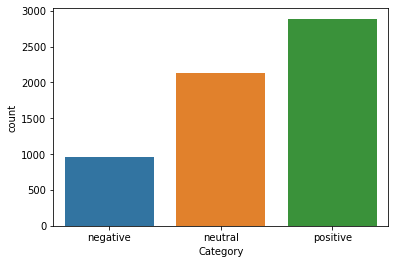

In [50]:
sns.countplot(x= 'Category',data = data)

# **Vertorize tweets**

In [119]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import math

[nltk_data] Downloading package punkt to /home/jaroslaw/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jaroslaw/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Clean tweet method**

In [81]:
def clean_tweet(tweet):
    tweet_list = [ele for ele in tweet.lower().split()]
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

**Normalization tokens method**

In [96]:
def normalization(clean_tokens):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for tokens in clean_tokens:
            normalized_text = lem.lemmatize(tokens,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet

In [85]:
clean_tokens = [[item['Id'], clean_tweet(item['Tweet'].lower())] for (index, item) in data.iterrows()]

In [86]:
print(clean_tokens[10])

['6,36440904967062E+017', ['parkrun', 'app', 'ios', 'downloaded', 'app', 'easier', 'access', 'info', 'ready', 'run']]


In [98]:
normalize_tokens = [[id, normalization(tokens)] for (id, tokens) in clean_tokens]

In [99]:
print(normalize_tokens[10])

['6,36440904967062E+017', ['parkrun', 'app', 'ios', 'download', 'app', 'easier', 'access', 'info', 'ready', 'run']]


**Get unique tokens method**

In [108]:
def unique_tokens(token_list):
    token_set = set()
    for (id, tokens) in token_list:
        for item in tokens:
            token_set.add(item)
    return token_set

In [109]:
print(len(unique_tokens(normalize_tokens)))

7073


In [122]:
unique_set = unique_tokens(normalize_tokens)
pattern_unique_map = {item: 0 for item in unique_set} 
# print(pattern_unique_map)
# new_map = pattern_unique_map.copy()
# new_map['prosecutor'] = new_map['prosecutor'] + 1
# print(patter_unique_map['prosecutor'])
# print(new_map['prosecutor'])

**Count idf for token and tokens_list method**

In [123]:
def count_idf(token, tokens_list):
    number_of_documents = len(tokens_list)
    term_in_documents = 0
    for (id, tokens) in tokens_list:
        for t in tokens:
            if t == token:
                term_in_documents += 1
                break
    return math.log2(number_of_documents/term_in_documents)

**Test count_idf for a few words**

In [125]:
print(count_idf('prosecutor', normalize_tokens))
print(count_idf('bye', normalize_tokens))
print(count_idf('general', normalize_tokens))
print(count_idf('much', normalize_tokens))
print(count_idf('baby', normalize_tokens))

12.543273538449803
10.958311037728647
10.221345443562441
6.100330042601075
8.543273538449803


**Count idfs for all unique tokens**

In [126]:
idf_list = [count_idf(item, normalize_tokens) for item in unique_set]